<a href="https://colab.research.google.com/github/rajsaumyaa/ML_labs/blob/main/exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-550007120.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-550007120.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Decision Tree Accuracy: 0.753731343283582


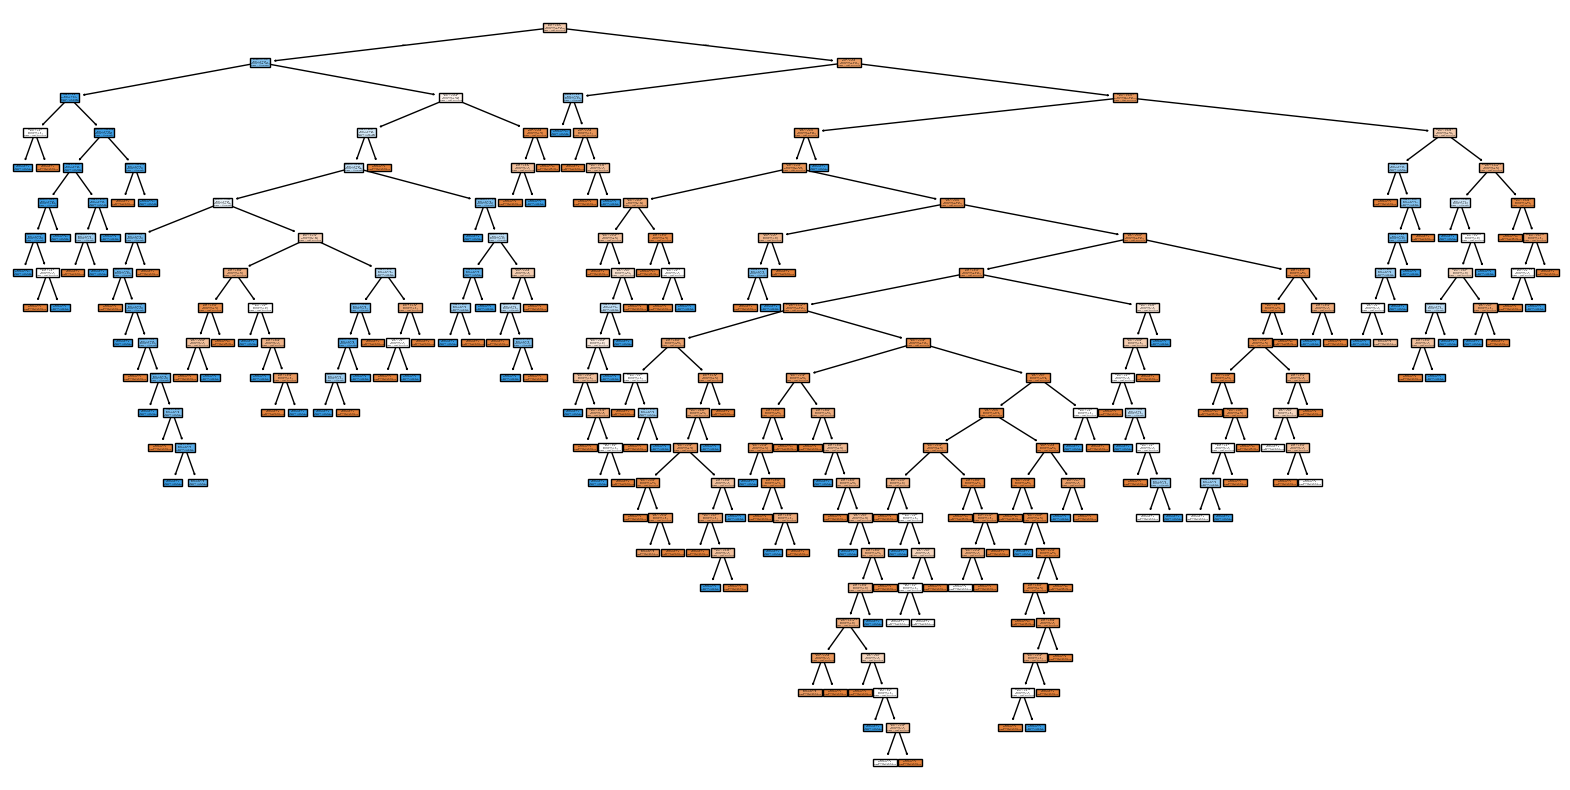

Random Forest Accuracy: 0.7835820895522388


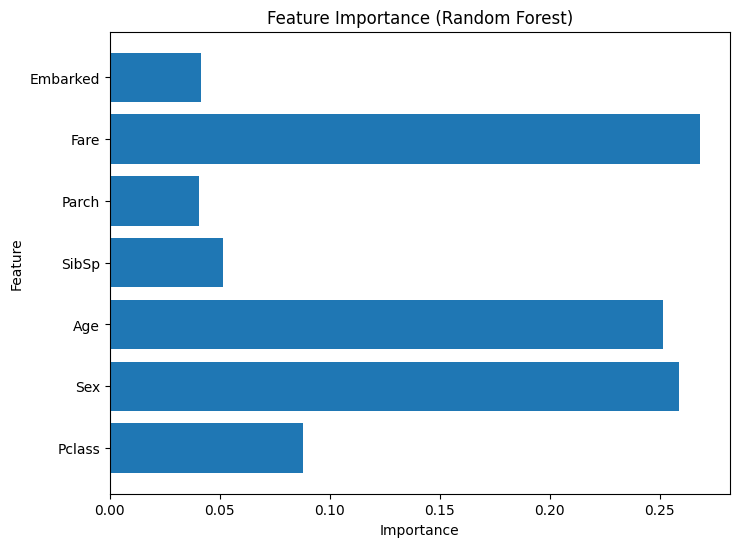

Pruned Decision Tree Accuracy: 0.8208955223880597


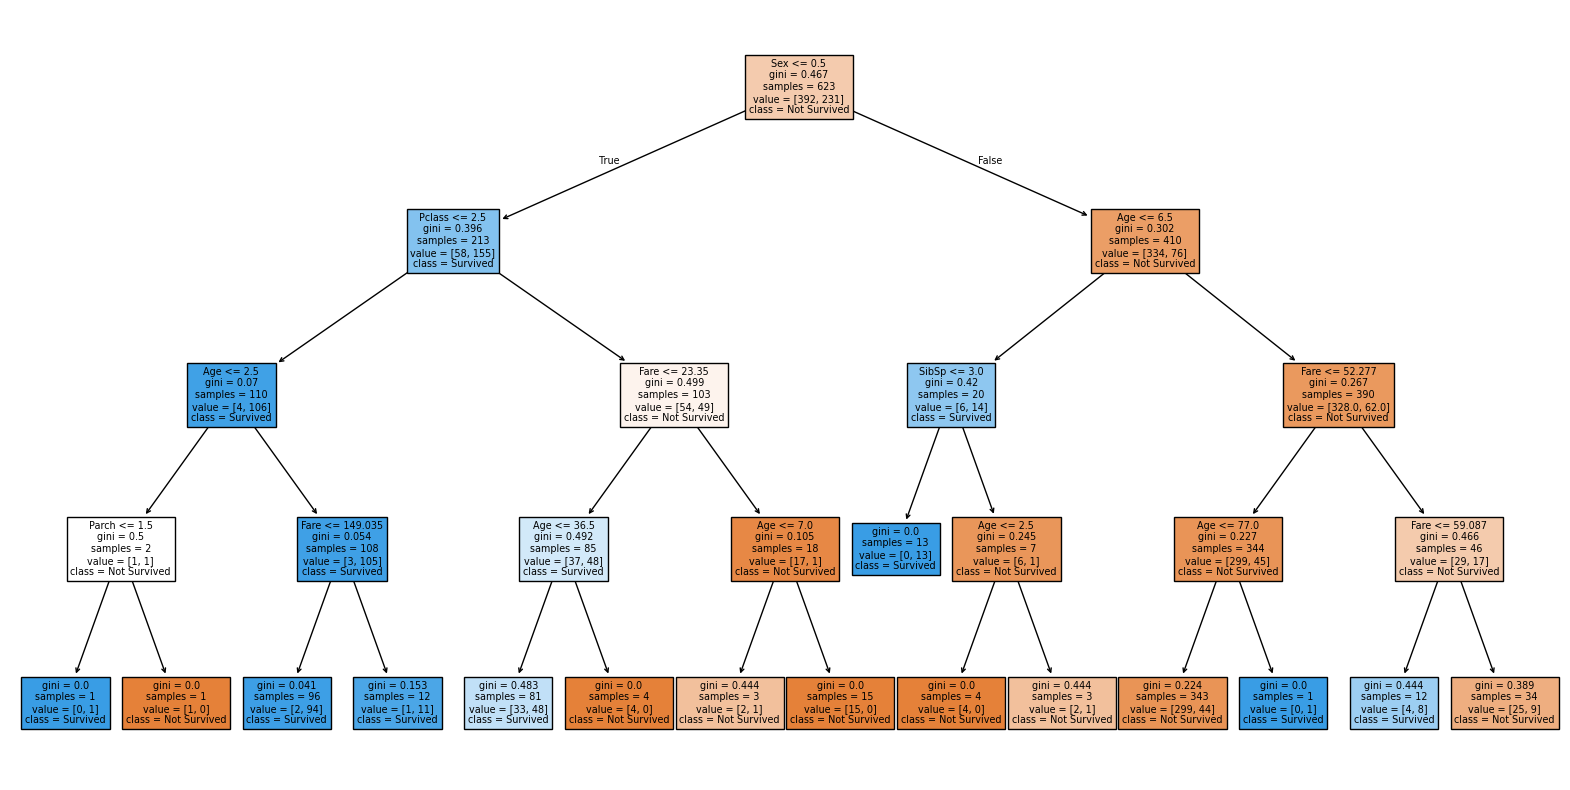

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[features + ['Survived']]

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# Features and target
X = data[features]
y = data['Survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=features,
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.show()

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature importance from Random Forest
importances = rf.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Perform pruning (limit max depth)
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

# Visualize pruned tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_pruned,
    feature_names=features,
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.show()
